# 케라스 함수형 API 예제 실습

이 노트북은 아래 문서에 실려 있는 다섯 가지 예제를 실습하면서 작성한 것입니다.

* [The keras functional API: five simple examples](https://tomroth.dev/keras), TOM ROTH

## 샘플 데이터 생성

입력 데이터는 세 변수 $(x_1, x_2, x_3)$로 구성되고 출력 데이터는 두 변수 $(y_{classifier}, y_{cts})$로 구성됩니다. cts는 continuous의 줄임말입니다. 두 개의 출력 변수는 다양한 모델을 테스트하는데 사용됩니다.

In [1]:
import numpy as np

n_row = 1000

x1 = np.random.randn(n_row)
x2 = np.random.randn(n_row)
x3 = np.random.randn(n_row)

y_classifier = np.array([1 if (x1[i] + x2[i] + x3[i]/3 + np.random.randn(1)) > 1 else 0 for i in range(n_row)])
y_cts = x1 + x2 + x3/3 + np.random.randn(n_row)

dat = np.array([x1, x2, x3]).transpose()

print(f'dat.shape: {dat.shape}')
print(f'y_classifier.shape: {y_classifier.shape}')
print(f'y_cts.shape: {y_cts.shape}')

dat.shape: (1000, 3)
y_classifier.shape: (1000,)
y_cts.shape: (1000,)


데이터 분포를 살펴보기 위하여 $x_1, x_2$ 두 차원으로 산점도를 그리고 각 점의 색상은 $y_{classifier}$ 값으로 구분하였습니다.

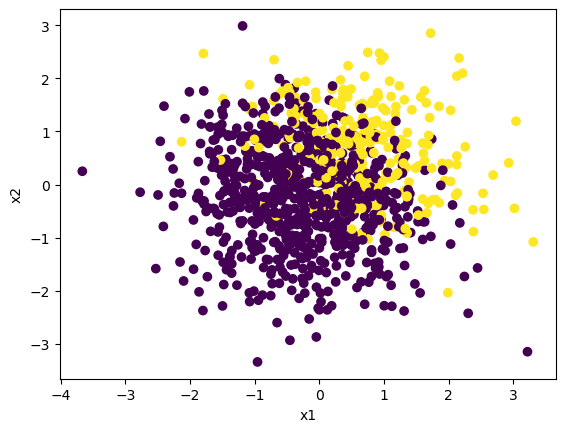

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(dat[:, 0], dat[:, 1], c=y_classifier)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

이번에는 각 점의 색상을 $y_{cts}$ 값으로 구분해 보았습니다.

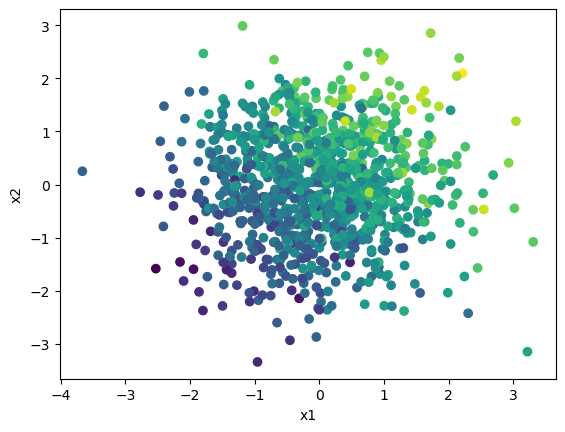

In [3]:
plt.scatter(dat[:, 0], dat[:, 1], c=y_cts)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## 훈련 데이터와 검증 데이터로 나누기

위에서 생성한 데이터를 8:2의 비율로 훈련 데이터와 검증 데이터로 나눕니다.

In [4]:
idx_list = np.linspace(0, 999, num=1000)
idx_test = np.random.choice(n_row, size=200, replace=False)
idx_train = np.delete(idx_list, idx_test).astype('int')

dat_train = dat[idx_train, :]
dat_test = dat[idx_test, :]

y_classifier_train = y_classifier[idx_train]
y_classifier_test = y_classifier[idx_test]

y_cts_train = y_cts[idx_train]
y_cts_test = y_cts[idx_test]

## 예제 1 - 로지스틱 회귀 (Logistic Regression)

2024-03-13 13:44:25.838734: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-13 13:44:25.926432: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-13 13:44:25.928514: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-13 13:44:25.928525: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

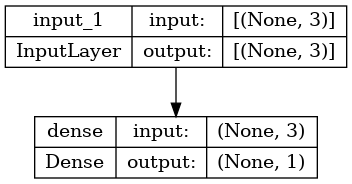

In [5]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils.vis_utils import plot_model

inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
regression_model = Model(inputs, output)
plot_model(regression_model, show_shapes=True)

In [6]:
regression_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
regression_model.optimizer.lr = 0.001
regression_model.fit(x=dat_train, y=y_classifier_train, epochs=10, verbose=1,
         validation_data=(dat_test, y_classifier_test))

Epoch 1/10
25/25 [==============================] - 0s 4ms/step - loss: 0.9383 - accuracy: 0.4700 - val_loss: 0.9397 - val_accuracy: 0.4900
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 0.9333 - accuracy: 0.4712 - val_loss: 0.9348 - val_accuracy: 0.4900
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 0.9282 - accuracy: 0.4737 - val_loss: 0.9299 - val_accuracy: 0.4900
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.9232 - accuracy: 0.4737 - val_loss: 0.9251 - val_accuracy: 0.4900
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 0.9182 - accuracy: 0.4762 - val_loss: 0.9203 - val_accuracy: 0.4850
Epoch 6/10
25/25 [==============================] - 0s 1ms/step - loss: 0.9133 - accuracy: 0.4762 - val_loss: 0.9155 - val_accuracy: 0.4850
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: 0.9084 - accuracy: 0.4762 - val_loss: 0.9108 - val_accuracy: 0.4850
Epoch 8/10
25/25 [==

In [7]:
print(regression_model.get_weights())

[array([[ 0.3416377],
       [-0.7492742],
       [ 1.0510463]], dtype=float32), array([-0.05351123], dtype=float32)]


## 예제 2 - 선형 회귀 (Linear Regression)

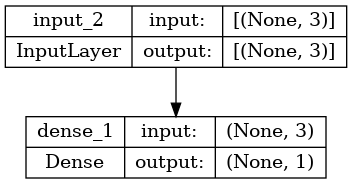

In [8]:
inputs = Input(shape=(3,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)
plot_model(linear_model, show_shapes=True)

In [9]:
linear_model.compile(optimizer='sgd', loss='mse')
linear_model.fit(x=dat_train, y=y_cts_train, epochs=10, verbose=1,
         validation_data=(dat_test, y_cts_test))

Epoch 1/10
25/25 [==============================] - 0s 3ms/step - loss: 1.9252 - val_loss: 1.6130
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 1.2957 - val_loss: 1.3145
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 1.0764 - val_loss: 1.2101
Epoch 4/10
25/25 [==============================] - 0s 1ms/step - loss: 1.0001 - val_loss: 1.1749
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 0.9730 - val_loss: 1.1631
Epoch 6/10
25/25 [==============================] - 0s 968us/step - loss: 0.9631 - val_loss: 1.1579
Epoch 7/10
25/25 [==============================] - 0s 966us/step - loss: 0.9607 - val_loss: 1.1572
Epoch 8/10
25/25 [==============================] - 0s 973us/step - loss: 0.9595 - val_loss: 1.1572
Epoch 9/10
25/25 [==============================] - 0s 1ms/step - loss: 0.9594 - val_loss: 1.1570
Epoch 10/10
25/25 [==============================] - 0s 1ms/step - loss: 0.9590 - val_loss: 1.1568


In [10]:
print(linear_model.get_weights())

[array([[1.028851  ],
       [1.0058804 ],
       [0.34478492]], dtype=float32), array([0.01524238], dtype=float32)]


7/7 [==============================] - 0s 636us/step


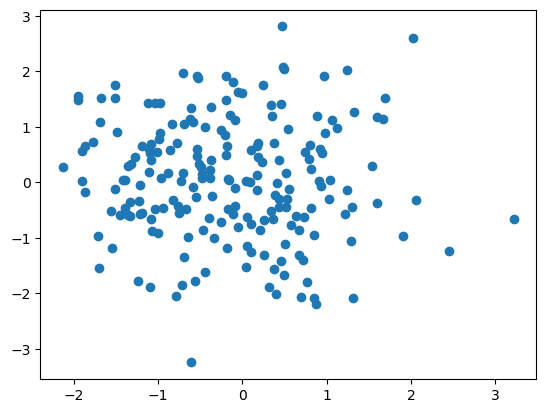

In [11]:
preds = linear_model.predict(dat_test)
plt.scatter(x=dat_test[:, 0], y=np.array(preds) - np.array(y_cts_test).reshape(200,1))

## 예제 3 - 단순 신경망 (Simple Neural Network)

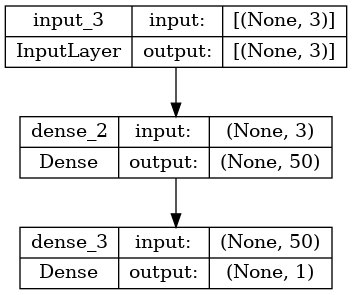

In [12]:
inputs = Input(shape=(3,))
x = Dense(50, activation='relu')(inputs)
output = Dense(1, activation='sigmoid')(x)
n_net = Model(inputs, output)
plot_model(n_net, show_shapes=True)

In [13]:
n_net.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
n_net.fit(x=dat_train, y=y_classifier_train, epochs=10, verbose=1,
         validation_data=(dat_test, y_classifier_test))

Epoch 1/10
25/25 [==============================] - 0s 3ms/step - loss: 0.7411 - accuracy: 0.3913 - val_loss: 0.6911 - val_accuracy: 0.5750
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6446 - accuracy: 0.7088 - val_loss: 0.6076 - val_accuracy: 0.7850
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 0.5758 - accuracy: 0.8138 - val_loss: 0.5459 - val_accuracy: 0.8200
Epoch 4/10
25/25 [==============================] - 0s 1ms/step - loss: 0.5231 - accuracy: 0.8163 - val_loss: 0.5004 - val_accuracy: 0.8200
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 0.4839 - accuracy: 0.8188 - val_loss: 0.4648 - val_accuracy: 0.8300
Epoch 6/10
25/25 [==============================] - 0s 1ms/step - loss: 0.4533 - accuracy: 0.8213 - val_loss: 0.4382 - val_accuracy: 0.8200
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.8250 - val_loss: 0.4175 - val_accuracy: 0.8200
Epoch 8/10
25/25 [==

## 예제 4 - 심층 신경망 (Deep Neural Network)

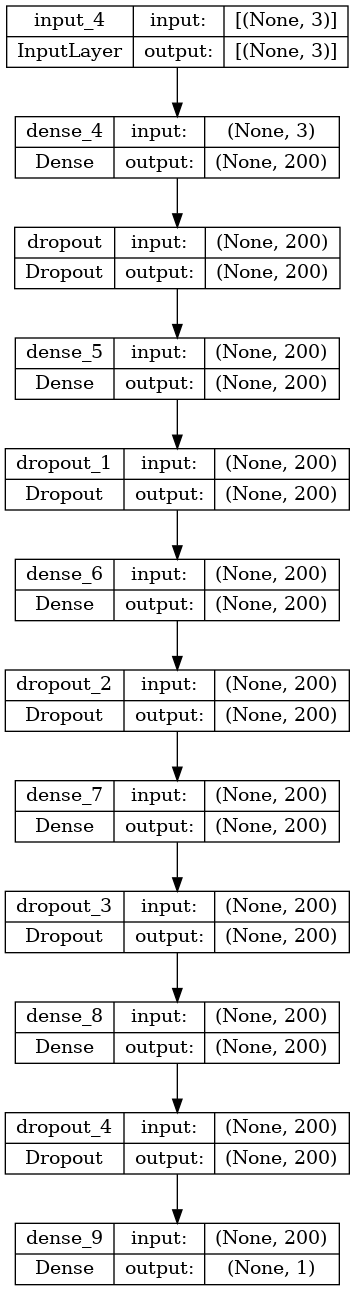

In [14]:
from keras.layers import Dropout

n_layers = 5

inputs = Input(shape=(3,))

x = Dense(200, activation='relu')(inputs)
x = Dropout(0.4)(x)

for layer in range(n_layers - 1):
    x = Dense(200, activation='relu')(x)
    x = Dropout(0.3)(x)
    
output = Dense(1, activation='sigmoid')(x)
deep_n_net = Model(inputs, output)
plot_model(deep_n_net, show_shapes=True)

In [15]:
deep_n_net.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
deep_n_net.fit(x=dat_train, y=y_classifier_train, epochs=10, verbose=1,
         validation_data=(dat_test, y_classifier_test))

Epoch 1/10
25/25 [==============================] - 1s 5ms/step - loss: 0.5466 - accuracy: 0.7038 - val_loss: 0.4036 - val_accuracy: 0.7800
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.7887 - val_loss: 0.3841 - val_accuracy: 0.8050
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.7937 - val_loss: 0.3936 - val_accuracy: 0.8150
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8150 - val_loss: 0.3825 - val_accuracy: 0.8250
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3756 - accuracy: 0.8062 - val_loss: 0.3830 - val_accuracy: 0.8200
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8200 - val_loss: 0.3793 - val_accuracy: 0.8450
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3730 - accuracy: 0.8188 - val_loss: 0.3719 - val_accuracy: 0.8400
Epoch 8/10
25/25 [==

## 예제 5 - 단순 신경망 + 메타데이터 (Simple Neural Network + Metadata)

복수의 입력 데이터를 사용하는 모델을 구성합니다.

In [16]:
metadata_1 = y_classifier + np.random.gumbel(scale=0.6, size=n_row)
metadata_2 = y_classifier + np.random.laplace(scale=0.5, size=n_row)
metadata = np.array([metadata_1, metadata_2]).T
print(metadata.shape)

metadata_train = metadata[idx_train, :]
metadata_test = metadata[idx_test, :]

(1000, 2)


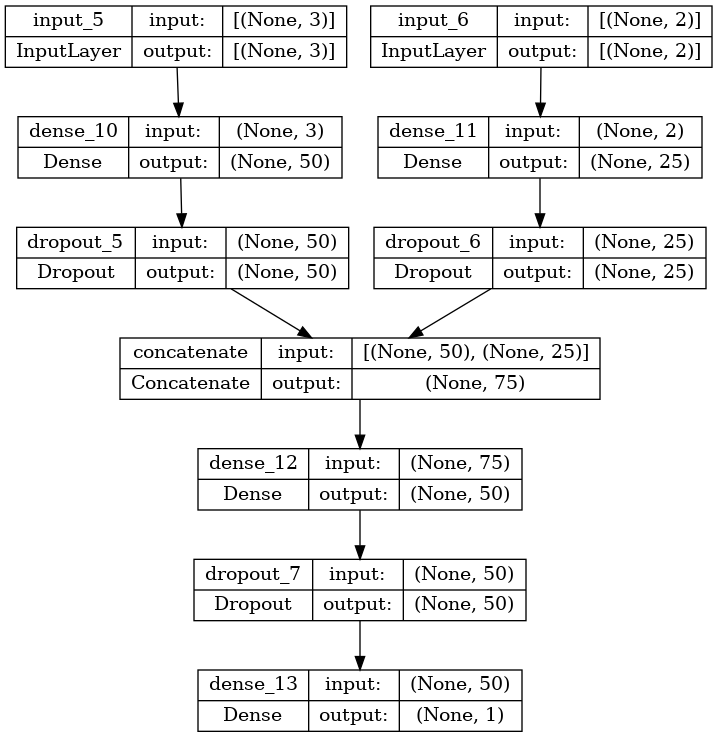

In [17]:
from keras.layers import concatenate

input_dat = Input(shape=(3,))
n_net_layer = Dense(50, activation='relu')
x1 = n_net_layer(input_dat)
x1 = Dropout(0.5)(x1)

input_metadata = Input(shape=(2,))
x2 = Dense(25, activation='relu')(input_metadata)
x2 = Dropout(0.3)(x2)

con = concatenate(inputs=[x1, x2])

x3 = Dense(50)(con)
x3 = Dropout(0.3)(x3)

output = Dense(1, activation='sigmoid')(x3)

meta_n_net = Model(inputs=[input_dat, input_metadata], outputs=output)

plot_model(meta_n_net, show_shapes=True)

In [18]:
meta_n_net.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
meta_n_net.fit(x=[dat_train, metadata_train], y=y_classifier_train, epochs=10, verbose=1,
              validation_data=([dat_test, metadata_test], y_classifier_test))

Epoch 1/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6823 - accuracy: 0.5900 - val_loss: 0.6311 - val_accuracy: 0.6750
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.6825 - val_loss: 0.5640 - val_accuracy: 0.7200
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 0.5469 - accuracy: 0.7337 - val_loss: 0.5135 - val_accuracy: 0.7600
Epoch 4/10
25/25 [==============================] - 0s 1ms/step - loss: 0.5273 - accuracy: 0.7437 - val_loss: 0.4751 - val_accuracy: 0.7950
Epoch 5/10
25/25 [==============================] - 0s 1ms/step - loss: 0.4857 - accuracy: 0.7638 - val_loss: 0.4441 - val_accuracy: 0.8200
Epoch 6/10
25/25 [==============================] - 0s 1ms/step - loss: 0.4598 - accuracy: 0.8087 - val_loss: 0.4165 - val_accuracy: 0.8550
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: 0.4455 - accuracy: 0.7962 - val_loss: 0.3946 - val_accuracy: 0.8750
Epoch 8/10
25/25 [==

## 정리

* 분류 작업을 수행하는 예제들의 결과를 보면 메타 데이터를 함께 사용하여 훈련한 모델의 예측 성능이 가장 높게 나온 것을 알 수 있습니다.